In [1]:

from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import pickle

In [2]:
### define 2d block spin and initial randomize
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

#### define move
def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

#### show the results after moving 1000 steps
def f(T):
    m=0
    a=initialstate(N)
    for i in range(1000):
         mcmove(a, 1/T)
    X, Y = np.meshgrid(range(N), range(N))
    plt.pcolormesh(X, Y, a, cmap=plt.cm.RdBu)
    plt.show()

#### show the spin results after moving 1000 steps
def outputdata(T):
    m=0
    a=initialstate(N)
    for i in range(1000):
         mcmove(a, 1/T)
    return a

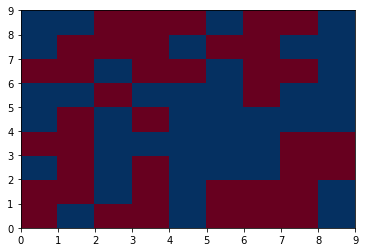

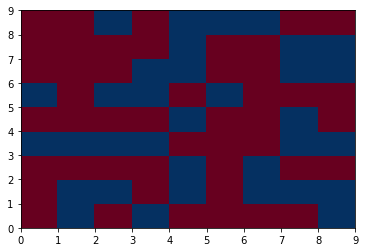

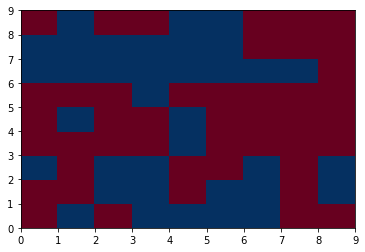

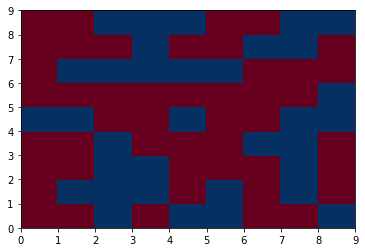

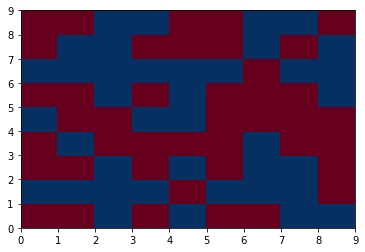

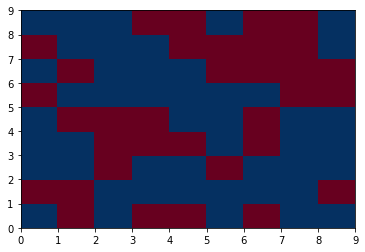

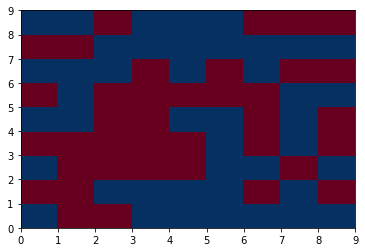

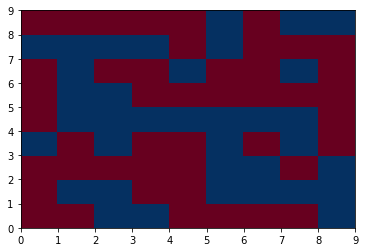

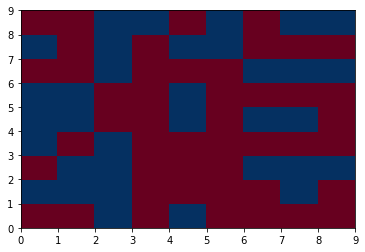

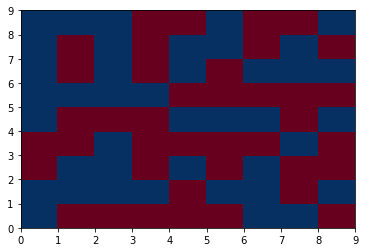

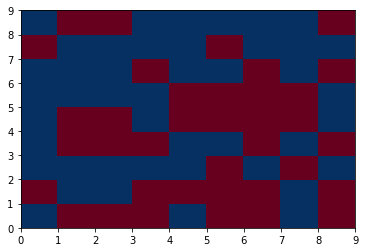

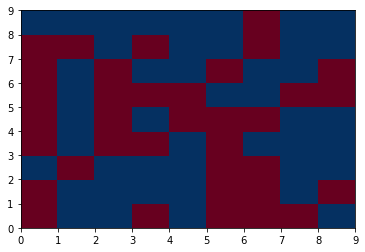

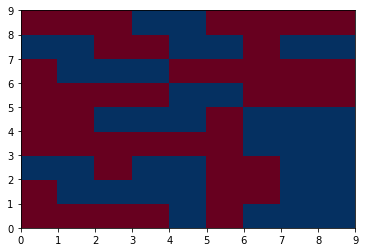

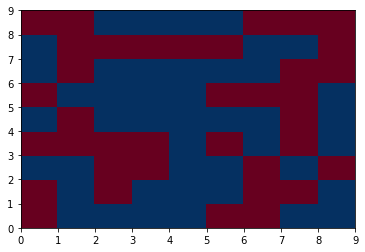

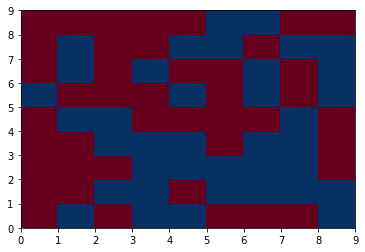

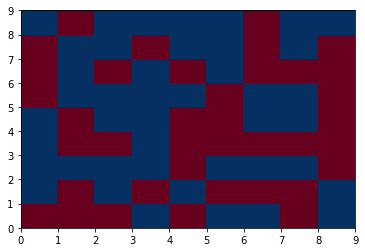

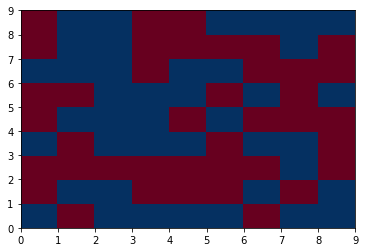

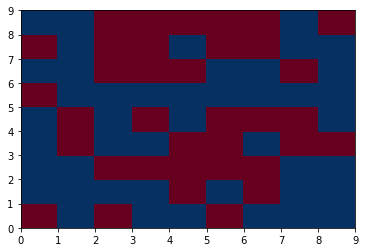

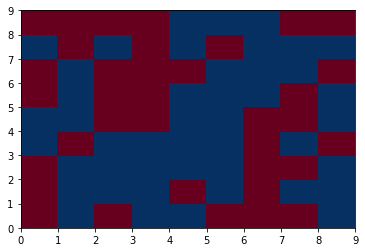

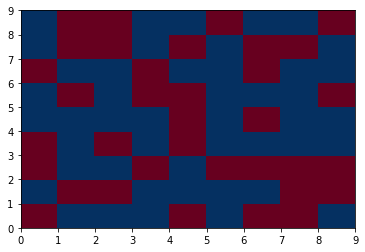

0

In [3]:
## T=1000 and and move 20 steps and sava the pictures
N=10  ## 10*10 spins

m=0
a=initialstate(N)
for i in range(20):
    mcmove(a, 1/1000)
    X, Y = np.meshgrid(range(N), range(N))
    plt.pcolormesh(X, Y, a, cmap=plt.cm.RdBu)
    plt.savefig(str(i)+'.png')

    plt.show()

    
#### combine gif
    
import glob
import os

gif_name = 'outputName'
file_list = glob.glob('*.png') # Get all the pngs in the current directory


with open('image_list.txt', 'w') as file:
    for item in file_list:
        file.write("%s\n" % item)

os.system('convert @image_list.txt {}.gif'.format(gif_name)) # On windows convert is 'magick'
